In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_olivetti_faces
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
gpus = tf.config.experimental.list_physical_devices('GPU') #with import tensorflow
tf.config.experimental.set_memory_growth(gpus[0], True) # me too

/tmp/ipykernel_10091/2842594296.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-02-26 11:05:38.546102: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-26 11:05:38.583268: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 11:05

In [3]:
X = np.array([ [0, 0],
              [1, 0],
              [0, 1],
              [1, 1] ])
y = np.array([ [0], [1], [1], [0] ])


In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation="sigmoid", input_shape=(2,)),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


2024-02-26 11:05:40.345693: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-26 11:05:40.346080: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-26 11:05:40.346245: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [5]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss="mse")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
hist = model.fit(X, y, epochs=5000, batch_size=1) #학습은 무조건 나눠서 할것 한번에 하다 뻑난다


Epoch 1/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 2/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 3/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 4/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 5/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 6/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.0070
Epoch 7/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0070
Epoch 8/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 9/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 10/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 11/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 12/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0070
Epoch 13/5000
4/4 [==============================

In [39]:
model.predict(X)


1/1 [==============================] - 0s 18ms/step


array([[0.07241699],
       [0.92095256],
       [0.9185457 ],
       [0.06482568]], dtype=float32)

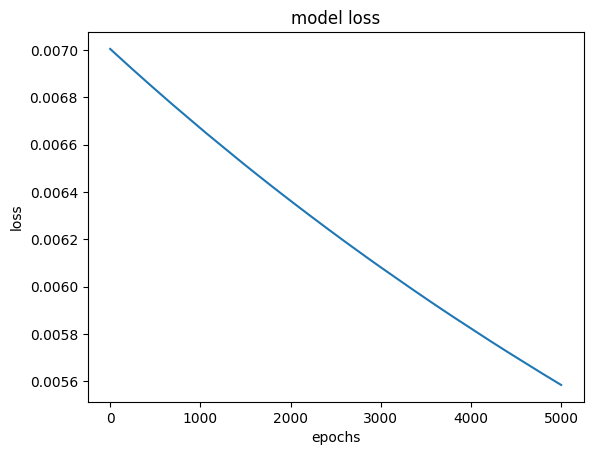

In [41]:
plt.plot(hist.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()

In [37]:
for w in model.weights:
    print("---")
    print(w)

---
<tf.Variable 'dense/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[ 5.1378555, -5.928693 ],
       [-4.8984346,  6.060509 ]], dtype=float32)>
---
<tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([2.4772582, 3.07025  ], dtype=float32)>
---
<tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-5.919731],
       [-5.78698 ]], dtype=float32)>
---
<tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([8.565658], dtype=float32)>
